# Logistic Regression (Логистическая регрессия)

## Теория. Общая информация об алгоритме

### Логистическая регрессия — это алгоритм классификации в машинном обучении для прогнозирования вероятности категориально зависимой переменной. 

Величина, которую прогнозируют, называется зависимой переменной. А факторы, на основе которых ее предсказывают, называются независимыми переменными, или предикторами. В логистической регрессии зависимые переменные — это двоичные (бинарные) переменные, содержащие 1 (да, успех, и так далее) или 0 — нет, неудача, и так далее. 

Другими словами, логистическая регрессия прогнозирует P(Y=1) как функцию от X. 

Она получила свое название благодаря тому, что использует логистическую функцию для прогнозирования вероятности принадлежности объекта к одному из классов.

Логистическая регрессия использует линейную комбинацию входных признаков и соответствующих весов, которая описывает линейную гиперплоскость в пространстве признаков. Затем этот результат проходит через логистическую функцию, которая переводит линейную комбинацию в вероятность принадлежности объекта к одному из классов.

*Гиперплоскости в информатике — это концепция, в которой прямая линия или плоскость используется для разделения различных областей в многомерном пространстве*

По своей сути логистическая регрессия просто берет уравнение линейной регрессии и использует его как параметр сигмовидной функции. Математически это выражается следующим образом:

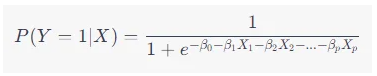

где:

Y — бинарный выходной результат (0 или 1)

X — вектор признаков, используемый для прогнозирования $Y$

P(Y=1|X) — вероятность того, что $Y$ равно 1 при заданном $X$

beta_0, beta_1, beta_2, …, beta_p — коэффициенты модели, которые нужно определить в ходе обучения, чтобы достичь наилучшего соответствия данных

e — число Эйлера

Логистическая регрессия также может быть использована для многоклассовой классификации, когда необходимо разделить данные на более чем два класса. Для этого обучают K моделей, каждая из которых отличается только целевым классом. По сути задача бинарной классификации решается несколько раз и выдается совокупное решение нескольких моделей.

Допущения логистической регрессии практически полностью совпадают с теми, которые есть для линейной
### Допущения логистической регрессии:

- Зависимая переменная должна быть бинарной, обычно её кодируют как ноль и один

- В случае двоичной регрессии уровень фактора 1 должен представлять из себя желаемый исход.

- Включены должны быть только значимые переменные.

- Независимость наблюдений друг от друга.

- Зависимые переменные линейно связаны с логарифмическими коэффициентами.

- Логистическая регрессия требует довольно большого размера выборок (хотя бы тридцать наблюдений)

- Отсутствие выбросов.


### Плюсы логистической регрессии:

1) Это относительно простой алгоритм, который требует небольшого количества вычислительных ресурсов и может быть эффективно использован для решения большого количества задач классификации.

2) Интерпретируемость: логистическая регрессия позволяет понимать, какие переменные влияют на классификацию и каким образом.

3) Работает хорошо на небольших наборах данных: логистическая регрессия показывает хорошие результаты на небольших наборах данных.

4) Небольшая вероятность переобучения: логистическая регрессия склонна к менее переобучению, поскольку она не имеет множества параметров, которые нужно оптимизировать.


### Минусы логистической регрессии:

1) Требуется нормализация признаков: логистическая регрессия требует нормализации признаков, чтобы гарантировать, что признаки вносят одинаковый вклад в модель.

2) Работает плохо на сложных задачах:  может работать плохо на задачах с большим количеством признаков или сложной структурой данных.

3) Линейность: логистическая регрессия работает только с линейными границами решений, что ограничивает ее способность решать сложные задачи классификации.

4) Низкая точность: логистическая регрессия может показывать низкую точность, если классы не являются линейно разделимыми.

### Функция активации

Функция активация служит для нормализации входных данных (оптимизация), то есть, если на вход поступает большое число, функция активации позволяет получить это число в нужном для нас диапазоне.

### Сигмоидная функция активации
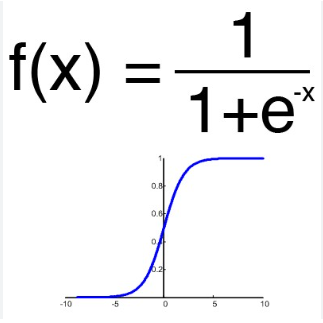

## Практика. Реализация алгоритма логистической регрессии

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report
import warnings
import time

In [23]:
class MyLogisticRegression:
    """
    Реализация логистической регрессии с нуля
    """
    
    def __init__(self, learning_rate=0.01, n_iter=1000, fit_intercept=True, verbose=False):
        """
        Инициализация параметров модели
        """
        self.learning_rate = learning_rate # learning_rate - скорость обучения для градиентного спуска (определяет размер шага)
        self.n_iter = n_iter # n_iter - количество итераций обучения
        self.fit_intercept = fit_intercept # fit_intercept - добавлять ли свободный член (аналог b в y = kx + b)
        self.verbose = verbose # verbose - выводить ли процесс обучения
        self.weights = None # weights - веса модели (будут инициализированы при обучении)
        self.loss_history = [] # loss_history - история значений функции потерь для анализа сходимости
        
    def _sigmoid(self, z):
        """
        Сигмоидная функция
        """
        # Для численной стабильности ограничиваем значения z
        # Преобразует любое число в диапазон (0, 1)
        # Функция np.clip (от английского "clip" - обрезать) в библиотеке NumPy ограничивает значения в массиве, 
        # чтобы они находились в заданном диапазоне. Это значит, что все элементы массива, которые меньше нижней 
        # границы диапазона, заменяются на эту нижнюю границу, а элементы, которые больше верхней границы, заменяются на верхнюю границу. 
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def _add_intercept(self, X):
        """
        Добавление столбца единиц для свободного члена
        """

        # Без intercept:
        # z = w₁x₁ + w₂x₂ + ... + wₙxₙ
        # ŷ = σ(z)
        
        # С intercept:
        # z = w₀·1 + w₁x₁ + w₂x₂ + ... + wₙxₙ
        # ŷ = σ(z)

        # Ключевые моменты:
        # Без intercept линия ВСЕГДА проходит через (0,0)
        # С intercept линия может занимать любое положение
        # В некоторых случаях без intercept точность будет близка к 0%
        # Intercept позволяет модели "сдвигать" разделяющую границу


        intercept = np.ones((X.shape[0], 1))
        return np.concatenate([intercept, X], axis=1)
    
    def _compute_loss(self, y, y_pred):
        """
        Вычисление функции потерь (бинарная перекрестная энтропия) - см. Loss-Function-info.ipynb
        """
        # Назначение: Измеряет, насколько предсказания отличаются от истинных значений

        # Для численной стабильности ограничиваем значения вероятностей
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        
        # Бинарная перекрестная энтропия
        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss
    
    def fit(self, X, y):
        """
        Обучение модели логистической регрессии
        """
        # Проверка входных данных
        X = np.array(X)
        y = np.array(y)
        
        # Добавление intercept при необходимости
        if self.fit_intercept:
            X = self._add_intercept(X)
        
        # Инициализация весов
        # Создаем вектор весов, инициализированный нулями.
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        
        # Градиентный спуск - это алгоритм оптимизации для нахождения минимума функции.
        for i in range(self.n_iter): # Запускаем итеративный процесс оптимизации весов - см. Gradient-Descent-info.ipynb
            # Прямое распространение: вычисление предсказаний
            # np.dot — это функция из библиотеки NumPy для Python, которая вычисляет скалярное произведение (для одномерных массивов) 
            # или матричное умножение (для двумерных массивов) между двумя массивами NumPy
            linear_output = np.dot(X, self.weights)
            y_pred = self._sigmoid(linear_output)
            
            # Вычисление потерь
            loss = self._compute_loss(y, y_pred)
            self.loss_history.append(loss)
            
            # Обратное распространение: вычисление градиента
            gradient = np.dot(X.T, (y_pred - y)) / len(y)
            
            # Обновление весов
            self.weights -= self.learning_rate * gradient
            
            # Вывод процесса обучения
            if self.verbose and i % 100 == 0:
                print(f"Iteration {i}, Loss: {loss:.6f}")
        
        return self
    
    def predict_proba(self, X):
        """
        Предсказание вероятностей принадлежности к классу 1
        """
        if self.weights is None:
            raise ValueError("Модель не обучена. Сначала вызовите fit().")
        
        if self.fit_intercept:
            X = self._add_intercept(X)
        
        linear_output = np.dot(X, self.weights)
        return self._sigmoid(linear_output)
    
    def predict(self, X, threshold=0.5):
        """
        Предсказание классов
        """
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)
    
        # Пример вероятностей
        # probabilities = np.array([0.2, 0.7, 0.4, 0.9, 0.1])
        # threshold = 0.5
        # Сравнение с порогом
        # comparison = probabilities >= threshold
        # print("probabilities >= 0.5:", comparison)
        # Вывод: [False, True, False, True, False]
        # Преобразование булевых значений в целые числа
        # binary_predictions = comparison.astype(int)
        # print("Binary predictions:", binary_predictions)
        # Вывод: [0, 1, 0, 1, 0]
    
    def get_weights(self):
        """
        Получение весов модели
        """
        return self.weights
    
    def plot_loss_history(self):
        """
        Визуализация истории потерь во время обучения
        """
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(self.loss_history)), self.loss_history)
        plt.title('История функции потерь во время обучения')
        plt.xlabel('Итерация')
        plt.ylabel('Потери')
        plt.grid(True)
        plt.show()



## Демонстрация работы реализованной логистической регрессии MyLogisticRegression и её сравнение с sklearn.linear_model LogisticRegression

=== ДЕМОНСТРАЦИЯ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ ===

Iteration 0, Loss: 0.693147
Iteration 100, Loss: 0.338877
Iteration 200, Loss: 0.303578
Iteration 300, Loss: 0.292338
Iteration 400, Loss: 0.287411
Iteration 500, Loss: 0.284891
Iteration 600, Loss: 0.283476
Iteration 700, Loss: 0.282630
Iteration 800, Loss: 0.282102
Iteration 900, Loss: 0.281761

5. Предсказания на тестовой выборке...
Probabilities:           0
0  0.277892
1  0.250030
2  0.307987
3  0.664340
4  0.742452
Предсказанные значения:    0
0  0
1  0
2  0
3  1
4  1
Фактические значения:    0
0  0
1  0
2  0
3  1
4  1
Оценка качества модели:
Точность (Accuracy): 0.8700
Матрица ошибок: 
[[83 12]
 [14 91]]
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        95
           1       0.88      0.87      0.88       105

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0

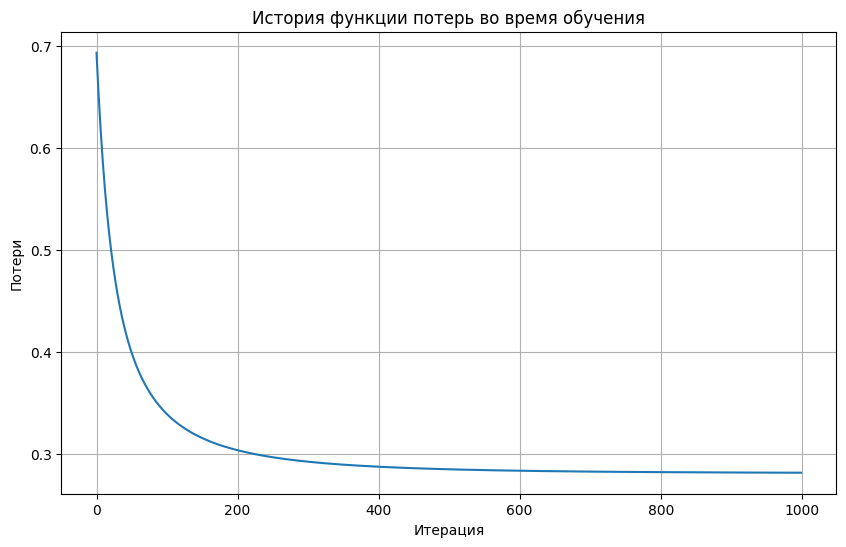

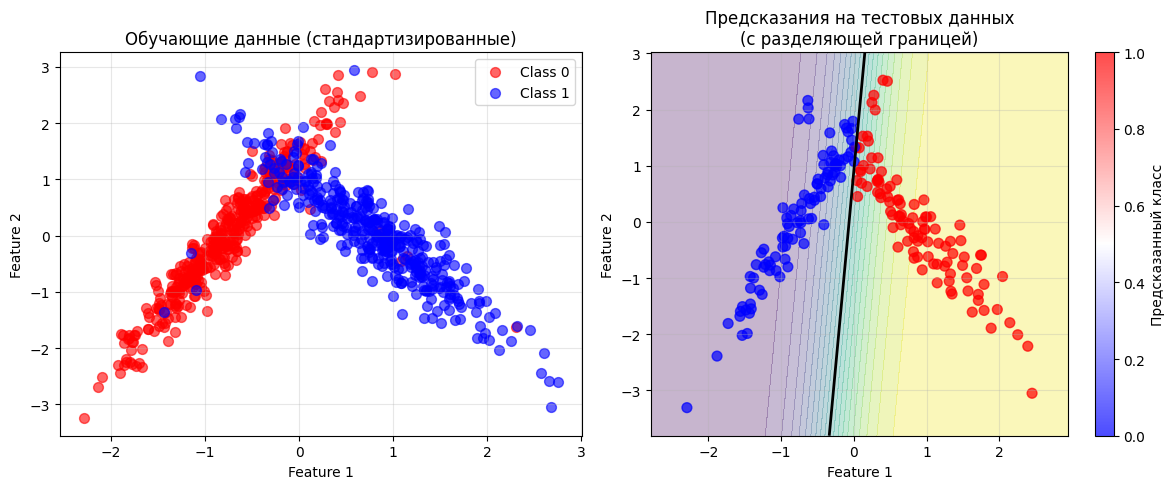

Интерпретация модели:
Свободный член (intercept): 0.2193
Вес признака 1: 3.3527
Вес признака 2: -0.2404

   Интерпретация:
- Признак 1 положительно влияет на вероятность класса 1
- Признак 2 отрицательно влияет на вероятность класса 1

СРАВНЕНИЕ С SKLEARN

Результаты сравнения
Точность нашей реализации: 0.7750
Точность sklearn: 0.7750
Разница: 0.0000

Сравнение весов
Наши веса:    [ 0.14530572 -0.21838299  2.75952809]
Sklearn веса: [ 0.13429479 -0.16595363  2.4091269 ]
Средняя разница весов: 0.137947

ПРИМЕР РАБОТЫ MyLogisticRegression С ПРОСТЫМИ ДАННЫМИ
Данные:
  X: [1 1], y: 1
  X: [2 2], y: 1
  X: [3 3], y: 1
  X: [6 6], y: 0
  X: [7 7], y: 0
  X: [8 8], y: 0

Предсказания:
  X: [4 4] -> P(class=1): 0.5023, Pred: 1
  X: [5 5] -> P(class=1): 0.2589, Pred: 0

Веса модели: [ 4.25206758 -0.53035625 -0.53035625]


In [24]:
# Демонстрация работы модели
def demonstrate_logistic_regression():
    """
    Демонстрация работы логистической регрессии на синтетических данных
    """
    print("=== ДЕМОНСТРАЦИЯ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ ===\n")
    
    # 1. Генерация синтетических данных (ИСПРАВЛЕННАЯ ВЕРСИЯ)
    X, y = make_classification(
        n_samples=1000,           # количество образцов (строк) в наборе данных
        n_features=2,             # количество признаков
        n_redundant=0,            # избыточные признаки
        n_informative=2,          # информативные признаки
        n_clusters_per_class=1,   # кластеры на класс
        flip_y=0.05,              # добавление шума
        random_state=42
    )
    
    # 2. Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # 3. Масштабирование признаков
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 4. Создание и обучение модели
    model = MyLogisticRegression(
        learning_rate=0.1,
        n_iter=1000,
        fit_intercept=True,
        verbose=True
    )
    
    model.fit(X_train_scaled, y_train)
    
    # 5. Предсказания
    print("\n5. Предсказания на тестовой выборке...")
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred = model.predict(X_test_scaled)

    print(f"Probabilities: {pd.DataFrame(y_pred_proba).head()}")
    print(f"Предсказанные значения: {pd.DataFrame(y_pred).head()}")
    print(f"Фактические значения: {pd.DataFrame(y_test).head()}")
    
    # 6. Оценка качества
    print("Оценка качества модели:")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Точность (Accuracy): {accuracy:.4f}")
    
    print("Матрица ошибок: ")
    cm = confusion_matrix(y_test, y_pred)
    print(f"{cm}")
    
    print("Отчет о классификации:")
    print(classification_report(y_test, y_pred))
    
    # 7. Визуализация    
    # График функции потерь
    model.plot_loss_history()
    
    plt.figure(figsize=(12, 5))
    
    # Левая часть: исходные данные
    plt.subplot(1, 2, 1)
    plt.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1], 
                c='red', alpha=0.6, label='Class 0', s=50)
    plt.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1], 
                c='blue', alpha=0.6, label='Class 1', s=50)
    plt.title('Обучающие данные (стандартизированные)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Правая часть: предсказания с разделяющей границей
    plt.subplot(1, 2, 2)
    
    # Создание meshgrid для отображения разделяющей границы
    x_min, x_max = X_test_scaled[:, 0].min() - 0.5, X_test_scaled[:, 0].max() + 0.5
    y_min, y_max = X_test_scaled[:, 1].min() - 0.5, X_test_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Предсказание для каждой точки meshgrid
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Отображение контуров
    plt.contourf(xx, yy, Z, alpha=0.3, levels=20)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    
    # Отображение тестовых точек
    scatter = plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, 
                         cmap='bwr', alpha=0.7, s=50)
    plt.colorbar(scatter, label='Предсказанный класс')
    
    plt.title('Предсказания на тестовых данных\n(с разделяющей границей)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 8. Интерпретация весов
    print("Интерпретация модели:")
    weights = model.get_weights()
    if model.fit_intercept:
        print(f"Свободный член (intercept): {weights[0]:.4f}")
        print(f"Вес признака 1: {weights[1]:.4f}")
        print(f"Вес признака 2: {weights[2]:.4f}")
        
        # Интерпретация влияния признаков
        print(f"\n   Интерпретация:")
        if weights[1] > 0:
            print(f"- Признак 1 положительно влияет на вероятность класса 1")
        else:
            print(f"- Признак 1 отрицательно влияет на вероятность класса 1")
            
        if weights[2] > 0:
            print(f"- Признак 2 положительно влияет на вероятность класса 1")
        else:
            print(f"- Признак 2 отрицательно влияет на вероятность класса 1")
    else:
        print(f"Вес признака 1: {weights[0]:.4f}")
        print(f"Вес признака 2: {weights[1]:.4f}")

# Сравнение с sklearn
def compare_with_sklearn():
    """
    Сравнение нашей реализации с sklearn
    """
    print("\n" + "="*50)
    print("СРАВНЕНИЕ С SKLEARN")
    print("="*50)
    
    # Генерация данных с корректными параметрами
    X, y = make_classification(
        n_samples=200,
        n_features=2,
        n_redundant=0,
        n_informative=2,
        n_clusters_per_class=1,
        flip_y=0.05,
        random_state=42
    )
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Наша реализация
    our_model = MyLogisticRegression(learning_rate=0.1, n_iter=1000, verbose=False)
    our_model.fit(X_train_scaled, y_train)
    our_pred = our_model.predict(X_test_scaled)
    our_accuracy = accuracy_score(y_test, our_pred)
    
    # Sklearn реализация
    from sklearn.linear_model import LogisticRegression as SKLogisticRegression
    sklearn_model = SKLogisticRegression(random_state=42)
    sklearn_model.fit(X_train_scaled, y_train)
    sklearn_pred = sklearn_model.predict(X_test_scaled)
    sklearn_accuracy = accuracy_score(y_test, sklearn_pred)
    
    print("\nРезультаты сравнения")
    print(f"Точность нашей реализации: {our_accuracy:.4f}")
    print(f"Точность sklearn: {sklearn_accuracy:.4f}")
    print(f"Разница: {abs(our_accuracy - sklearn_accuracy):.4f}")
    
    # Сравнение весов
    our_weights = our_model.get_weights()
    sklearn_weights = np.concatenate([sklearn_model.intercept_.flatten(), 
                                    sklearn_model.coef_.flatten()])
    
    print(f"\nСравнение весов")
    print(f"Наши веса:    {our_weights}")
    print(f"Sklearn веса: {sklearn_weights}")
    print(f"Средняя разница весов: {np.mean(np.abs(our_weights - sklearn_weights)):.6f}")

# Дополнительный пример с реальными данными
def example_with_custom_data():
    """
    Пример использования с простыми ручными данными
    """
    print("\n" + "="*50)
    print("ПРИМЕР РАБОТЫ MyLogisticRegression С ПРОСТЫМИ ДАННЫМИ")
    print("="*50)
    
    # Простые данные для классификации
    X_simple = np.array([
        [1, 1], [2, 2], [3, 3],  # Класс 1
        [6, 6], [7, 7], [8, 8]   # Класс 0
    ])
    y_simple = np.array([1, 1, 1, 0, 0, 0])
    
    print("Данные:")
    for i in range(len(X_simple)):
        print(f"  X: {X_simple[i]}, y: {y_simple[i]}")
    
    # Обучение модели
    simple_model = MyLogisticRegression(learning_rate=0.1, n_iter=500, verbose=False)
    simple_model.fit(X_simple, y_simple)
    
    # Предсказание
    test_point = np.array([[4, 4], [5, 5]])
    probabilities = simple_model.predict_proba(test_point)
    predictions = simple_model.predict(test_point)
    
    print(f"\nПредсказания:")
    for i in range(len(test_point)):
        print(f"  X: {test_point[i]} -> P(class=1): {probabilities[i]:.4f}, Pred: {predictions[i]}")
    
    print(f"\nВеса модели: {simple_model.get_weights()}")

if __name__ == "__main__":
    # Запуск демонстрации
    demonstrate_logistic_regression()
    
    # Сравнение с sklearn
    compare_with_sklearn()
    
    # Пример с простыми данными
    example_with_custom_data()

## Сравнение работы логистической регрессии в экстремальном случае с intercept = True и False

ЭКСТРЕМАЛЬНЫЙ СЛУЧАЙ: все данные в первом квадранте (x>0, y>0)
Class 1: x∈[2.5, 4.4]
Class 0: x∈[0.0, 2.0]

Точность:
С intercept: 1.000
Без intercept: 0.738


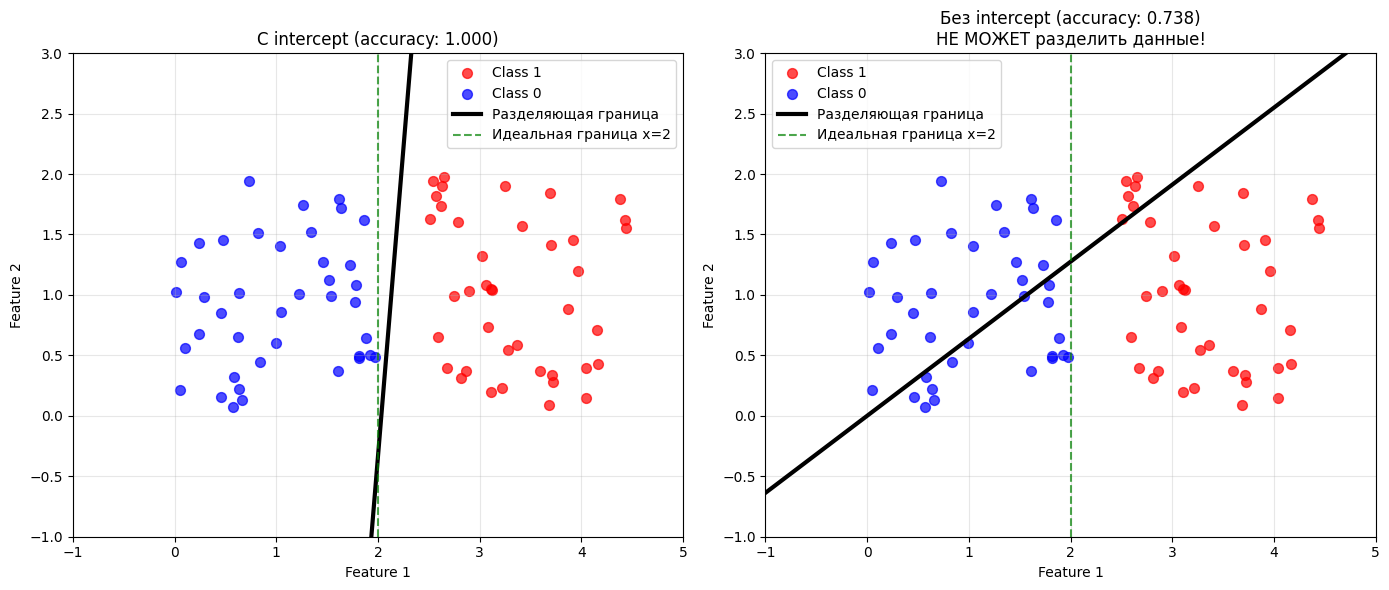


Объяснение:
Без intercept модель вынуждена проводить линию через (0,0)
Но все данные находятся справа от x=0, поэтому разделение невозможно!
Intercept позволяет 'сдвинуть' линию в нужное положение.


In [25]:
def visualize_intercept_extreme_case():
    """
    Экстремальный случай - данные в одном квадранте
    """
    np.random.seed(42)
    
    # Все данные в первом квадранте (x>0, y>0)
    # Но разделены вертикальной линией x=2
    
    class1 = np.random.rand(40, 2) * 2 + [2.5, 0]    # x: 2.5-4.5, y: 0-2
    class2 = np.random.rand(40, 2) * 2 + [0, 0]      # x: 0-2, y: 0-2
    
    X = np.vstack([class1, class2])
    y = np.hstack([np.ones(40), np.zeros(40)])
    
    print("ЭКСТРЕМАЛЬНЫЙ СЛУЧАЙ: все данные в первом квадранте (x>0, y>0)")
    print(f"Class 1: x∈[{class1[:, 0].min():.1f}, {class1[:, 0].max():.1f}]")
    print(f"Class 0: x∈[{class2[:, 0].min():.1f}, {class2[:, 0].max():.1f}]")
    
    # Обучаем модели
    model_with = MyLogisticRegression(fit_intercept=True, n_iter=2000, learning_rate=0.1, verbose=False)
    model_without = MyLogisticRegression(fit_intercept=False, n_iter=2000, learning_rate=0.1, verbose=False)
    
    model_with.fit(X, y)
    model_without.fit(X, y)
    
    # Предсказания
    pred_with = model_with.predict(X)
    pred_without = model_without.predict(X)
    
    accuracy_with = np.mean(pred_with == y)
    accuracy_without = np.mean(pred_without == y)
    
    print(f"\nТочность:")
    print(f"С intercept: {accuracy_with:.3f}")
    print(f"Без intercept: {accuracy_without:.3f}")
    
    # Визуализация
    plt.figure(figsize=(14, 6))
    
    # Левая часть: с intercept
    plt.subplot(1, 2, 1)
    plt.scatter(class1[:, 0], class1[:, 1], c='red', label='Class 1', alpha=0.7, s=50)
    plt.scatter(class2[:, 0], class2[:, 1], c='blue', label='Class 0', alpha=0.7, s=50)
    
    # Разделяющая граница с intercept
    w0, w1, w2 = model_with.weights
    x_plot = np.linspace(-1, 5, 100)
    y_plot = -(w0 + w1 * x_plot) / w2
    plt.plot(x_plot, y_plot, 'k-', linewidth=3, label='Разделяющая граница')
    plt.axvline(2, color='green', linestyle='--', alpha=0.7, label='Идеальная граница x=2')
    plt.title(f'С intercept (accuracy: {accuracy_with:.3f})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis([-1, 5, -1, 3])
    
    # Правая часть: без intercept
    plt.subplot(1, 2, 2)
    plt.scatter(class1[:, 0], class1[:, 1], c='red', label='Class 1', alpha=0.7, s=50)
    plt.scatter(class2[:, 0], class2[:, 1], c='blue', label='Class 0', alpha=0.7, s=50)
    
    # Разделяющая граница без intercept
    if len(model_without.weights) == 2:
        w1, w2 = model_without.weights
        y_plot = -(w1 * x_plot) / w2  # w₀ = 0
        plt.plot(x_plot, y_plot, 'k-', linewidth=3, label='Разделяющая граница')
    
    plt.axvline(2, color='green', linestyle='--', alpha=0.7, label='Идеальная граница x=2')
    plt.title(f'Без intercept (accuracy: {accuracy_without:.3f})\nНЕ МОЖЕТ разделить данные!')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis([-1, 5, -1, 3])
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nОбъяснение:")
    print("Без intercept модель вынуждена проводить линию через (0,0)")
    print("Но все данные находятся справа от x=0, поэтому разделение невозможно!")
    print("Intercept позволяет 'сдвинуть' линию в нужное положение.")

# Запускаем экстремальный случай
visualize_intercept_extreme_case()

Запуск полного сравнения логистической регрессии...
ПОЛНОЕ СРАВНЕНИЕ: НАША РЕАЛИЗАЦИЯ vs SKLEARN

1. СРАВНЕНИЕ ВРЕМЕНИ ОБУЧЕНИЯ:
Наша реализация: 0.0272 сек
Sklearn: 0.0164 сек
Отношение: 1.66x

2. СРАВНЕНИЕ ТОЧНОСТИ:
Наша реализация: 0.8800
Sklearn: 0.8800
Разница: 0.0000

3. СРАВНЕНИЕ ВЕСОВ:
Наши веса:    ['-0.3825', '3.0134', '-0.6531', '-0.9723']
Sklearn веса: ['-0.4088', '3.0252', '-0.6881', '-1.0110']
Средняя разница весов: 0.027975

4. СРАВНЕНИЕ ВЕРОЯТНОСТЕЙ:
Первые 5 предсказанных вероятностей:
   Пример 1: наша=0.8430, sklearn=0.8412, разница=0.0019
   Пример 2: наша=0.9459, sklearn=0.9437, разница=0.0022
   Пример 3: наша=0.9483, sklearn=0.9447, разница=0.0035
   Пример 4: наша=0.0561, sklearn=0.0547, разница=0.0014
   Пример 5: наша=0.9684, sklearn=0.9672, разница=0.0011


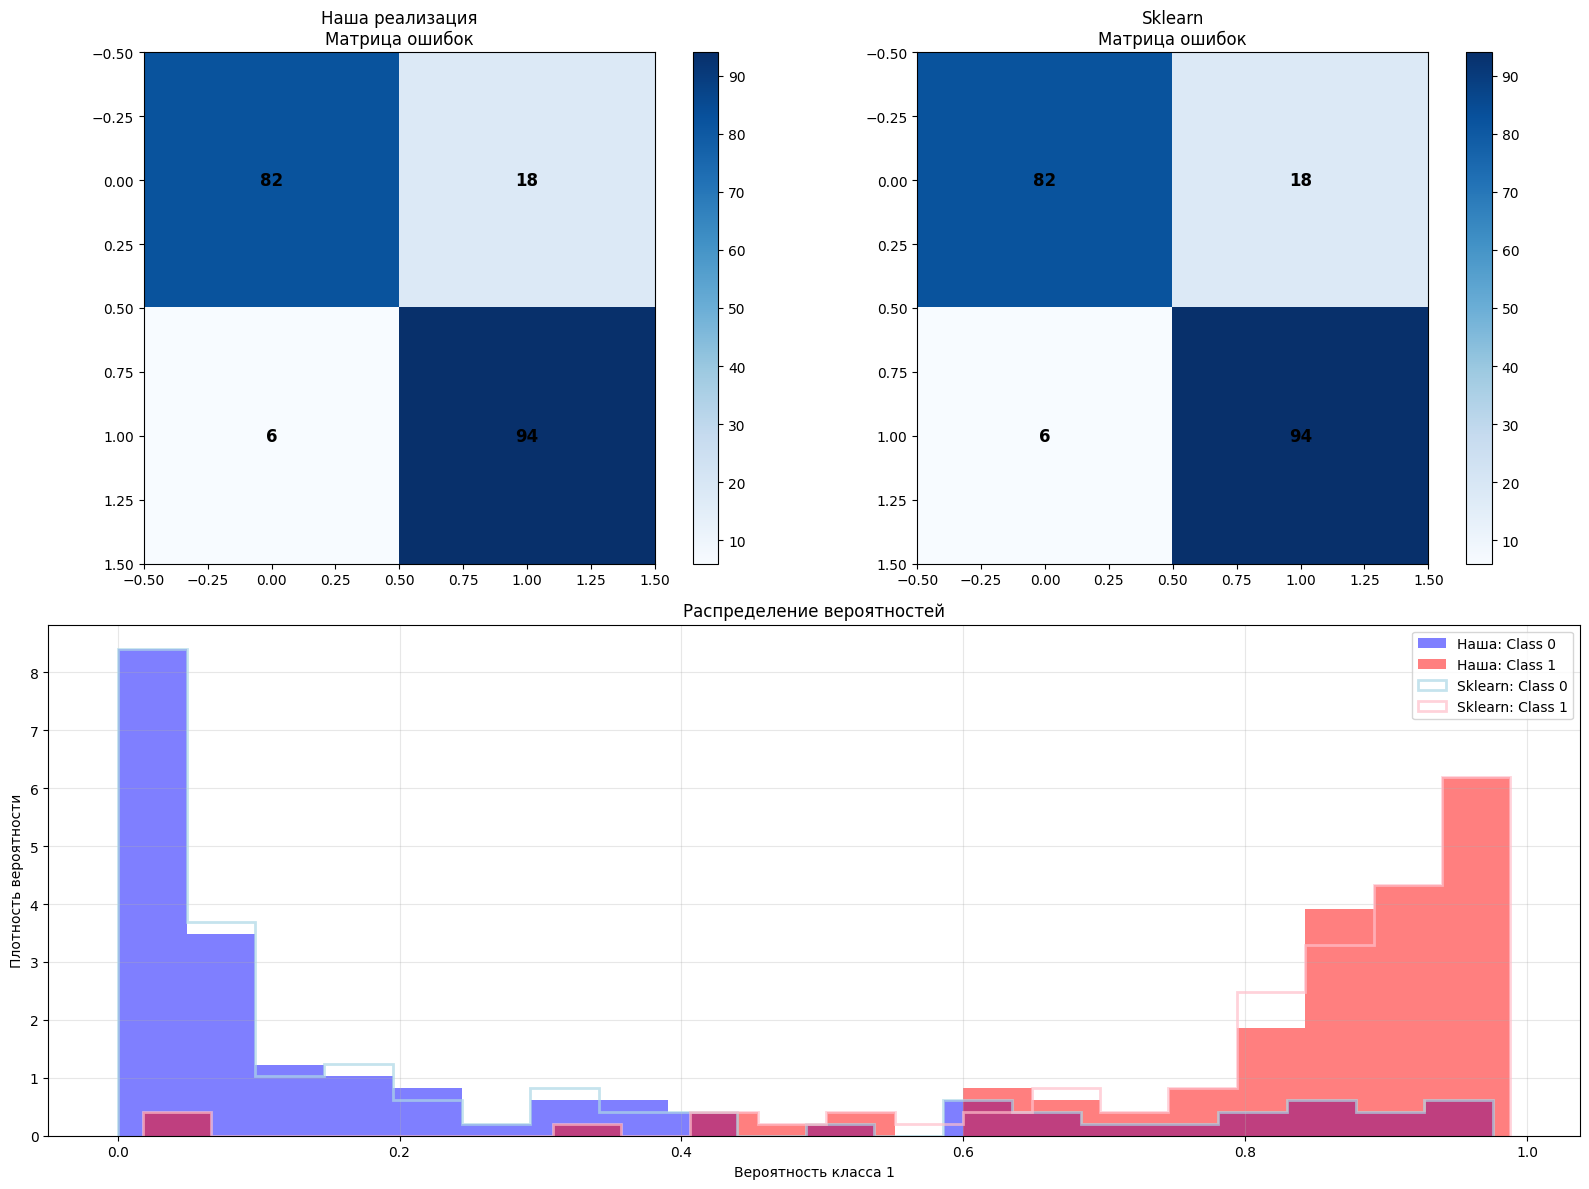


ДЕТАЛЬНОЕ СРАВНЕНИЕ СХОДИМОСТИ


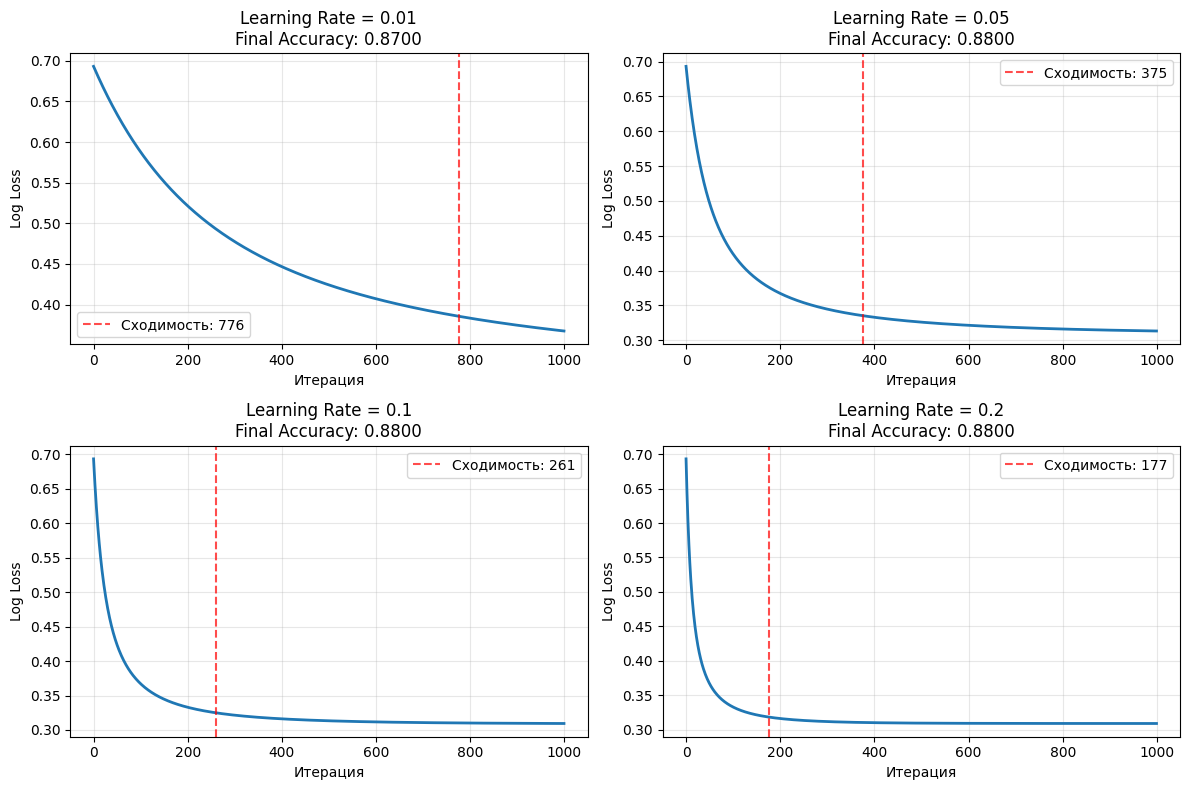


Результаты сравнения learning rates:
  LR=0.01: Точность=0.8700, Сходимость на итерации 776
  LR=0.05: Точность=0.8800, Сходимость на итерации 375
  LR=0.1: Точность=0.8800, Сходимость на итерации 261
  LR=0.2: Точность=0.8800, Сходимость на итерации 177
Слева от красной линии: Активная фаза обучения, модель значительно улучшается
 Справа от красной линии: Модель практически не улучшается, дальнейшее обучение неэффективно

СРАВНЕНИЕ ПРОИЗВОДИТЕЛЬНОСТИ НА БОЛЬШИХ ДАННЫХ

--- Размер данных: 500 ---
Время: Наша=0.019с, Sklearn=0.002с
Точность: Наша=0.7750, Sklearn=0.7790

--- Размер данных: 1000 ---
Время: Наша=0.026с, Sklearn=0.002с
Точность: Наша=0.7750, Sklearn=0.7790

--- Размер данных: 2000 ---
Время: Наша=0.035с, Sklearn=0.002с
Точность: Наша=0.7810, Sklearn=0.7810

--- Размер данных: 3000 ---
Время: Наша=0.049с, Sklearn=0.003с
Точность: Наша=0.7740, Sklearn=0.7750


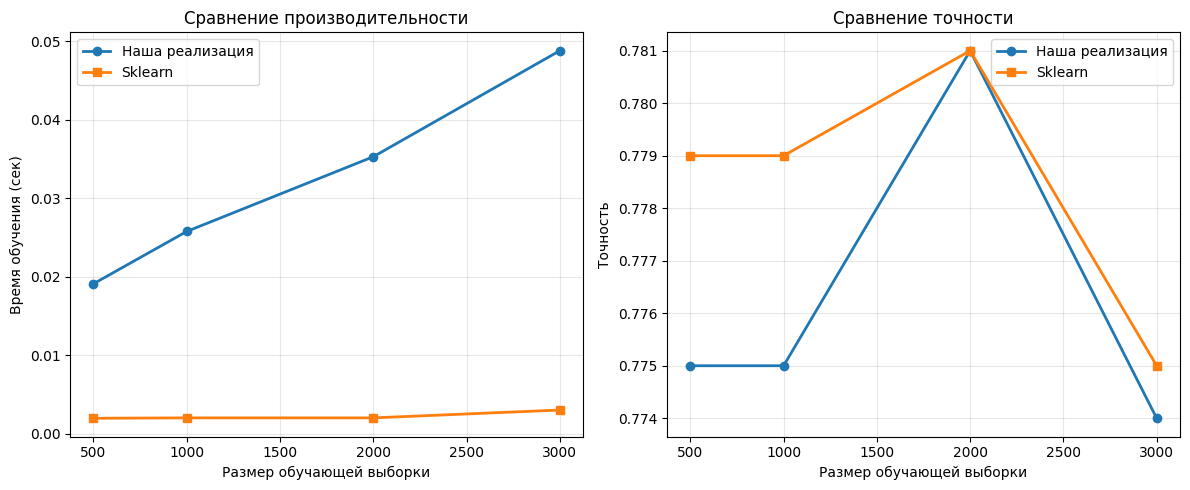

In [43]:
def comprehensive_comparison():
    """
    Полное сравнение нашей реализации и sklearn
    """
    print("=" * 70)
    print("ПОЛНОЕ СРАВНЕНИЕ: НАША РЕАЛИЗАЦИЯ vs SKLEARN")
    print("=" * 70)
    
    # Генерация данных для тестирования
    X, y = make_classification(
        n_samples=1000,
        n_features=3,
        n_informative=3,
        n_redundant=0,
        n_clusters_per_class=1,
        flip_y=0.1,
        random_state=42
    )
    
    # Разделение данных
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Масштабирование
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 1. Сравнение времени обучения
    print("\n1. СРАВНЕНИЕ ВРЕМЕНИ ОБУЧЕНИЯ:")
    
    # Наша реализация
    start_time = time.time()
    our_model = MyLogisticRegression(learning_rate=0.1, n_iter=1000, verbose=False)
    our_model.fit(X_train_scaled, y_train)
    our_time = time.time() - start_time
    
    # Sklearn реализация
    start_time = time.time()
    sklearn_model = SKLogisticRegression(
        random_state=42,
        max_iter=1000,
        solver='lbfgs'
    )
    sklearn_model.fit(X_train_scaled, y_train)
    sklearn_time = time.time() - start_time
    
    # Защита от деления на ноль
    if sklearn_time < 0.001:  # Если время слишком мало
        sklearn_time = 0.001  # Устанавливаем минимальное значение
    
    print(f"Наша реализация: {our_time:.4f} сек")
    print(f"Sklearn: {sklearn_time:.4f} сек")
    
    ratio = our_time / sklearn_time
    print(f"Отношение: {ratio:.2f}x")
    
    # 2. Сравнение точности
    print("\n2. СРАВНЕНИЕ ТОЧНОСТИ:")
    
    our_pred = our_model.predict(X_test_scaled)
    sklearn_pred = sklearn_model.predict(X_test_scaled)
    
    our_accuracy = accuracy_score(y_test, our_pred)
    sklearn_accuracy = accuracy_score(y_test, sklearn_pred)
    
    print(f"Наша реализация: {our_accuracy:.4f}")
    print(f"Sklearn: {sklearn_accuracy:.4f}")
    print(f"Разница: {abs(our_accuracy - sklearn_accuracy):.4f}")
    
    # 3. Сравнение весов
    print("\n3. СРАВНЕНИЕ ВЕСОВ:")
    
    our_weights = our_model.get_weights()
    sklearn_weights = np.concatenate([
        sklearn_model.intercept_.flatten(), 
        sklearn_model.coef_.flatten()
    ])
    
    print(f"Наши веса:    {['%.4f' % w for w in our_weights]}")
    print(f"Sklearn веса: {['%.4f' % w for w in sklearn_weights]}")
    
    weight_diff = np.mean(np.abs(our_weights - sklearn_weights))
    print(f"Средняя разница весов: {weight_diff:.6f}")
    
    # 4. Сравнение вероятностей
    print("\n4. СРАВНЕНИЕ ВЕРОЯТНОСТЕЙ:")
    
    our_proba = our_model.predict_proba(X_test_scaled[:5])
    sklearn_proba = sklearn_model.predict_proba(X_test_scaled[:5])[:, 1]
    
    print("Первые 5 предсказанных вероятностей:")
    for i in range(5):
        print(f"   Пример {i+1}: наша={our_proba[i]:.4f}, sklearn={sklearn_proba[i]:.4f}, "
              f"разница={abs(our_proba[i] - sklearn_proba[i]):.4f}")
    
    # 5. Визуализация сравнения
    visualize_comparison_enhanced(our_model, sklearn_model, X_train_scaled, y_train, X_test_scaled, y_test)
    
    return our_model, sklearn_model, X_train_scaled, y_train, X_test_scaled, y_test

def visualize_comparison_enhanced(our_model, sklearn_model, X_train_scaled, y_train, X_test, y_test):
    """
    Улучшенная визуализация сравнения моделей с историей обучения
    """
    plt.figure(figsize=(16, 12))
    
    # Предсказания обеих моделей
    our_pred = our_model.predict(X_test)
    sklearn_pred = sklearn_model.predict(X_test)
    
    # 1. Матрицы ошибок
    plt.subplot(2, 2, 1)
    cm_our = confusion_matrix(y_test, our_pred)
    plt.imshow(cm_our, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Наша реализация\nМатрица ошибок')
    plt.colorbar()
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm_our[i, j]), ha='center', va='center', fontsize=12, fontweight='bold')
    
    plt.subplot(2, 2, 2)
    cm_sklearn = confusion_matrix(y_test, sklearn_pred)
    plt.imshow(cm_sklearn, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Sklearn\nМатрица ошибок')
    plt.colorbar()
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm_sklearn[i, j]), ha='center', va='center', fontsize=12, fontweight='bold')
    
    # 2. Сравнение распределения вероятностей (растянутый график)
    plt.subplot(2, 1, 2)
    
    # Гистограммы вероятностей для двух классов
    our_proba = our_model.predict_proba(X_test)
    sklearn_proba = sklearn_model.predict_proba(X_test)[:, 1]
    
    our_proba_class0 = our_proba[y_test == 0]
    our_proba_class1 = our_proba[y_test == 1]
    sklearn_proba_class0 = sklearn_proba[y_test == 0]
    sklearn_proba_class1 = sklearn_proba[y_test == 1]
    
    # Проверяем, что есть данные для построения гистограмм
    if len(our_proba_class0) > 0 and len(our_proba_class1) > 0:
        plt.hist(our_proba_class0, bins=20, alpha=0.5, label='Наша: Class 0', color='blue', density=True)
        plt.hist(our_proba_class1, bins=20, alpha=0.5, label='Наша: Class 1', color='red', density=True)
        
    if len(sklearn_proba_class0) > 0 and len(sklearn_proba_class1) > 0:
        plt.hist(sklearn_proba_class0, bins=20, alpha=0.7, label='Sklearn: Class 0', 
                 color='lightblue', histtype='step', linewidth=2, density=True)
        plt.hist(sklearn_proba_class1, bins=20, alpha=0.7, label='Sklearn: Class 1', 
                 color='pink', histtype='step', linewidth=2, density=True)
    
    plt.xlabel('Вероятность класса 1')
    plt.ylabel('Плотность вероятности')
    plt.title('Распределение вероятностей')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def compare_convergence_detailed(X_train_scaled, y_train, X_test_scaled, y_test):
    """
    Детальное сравнение сходимости с разными learning rate
    """
    print("\n" + "=" * 60)
    print("ДЕТАЛЬНОЕ СРАВНЕНИЕ СХОДИМОСТИ")
    print("=" * 60)
    
    learning_rates = [0.01, 0.05, 0.1, 0.2]
    accuracies = []
    convergence_points = []
    
    plt.figure(figsize=(12, 8))
    
    for i, lr in enumerate(learning_rates):
        # Обучаем модель с разными learning rates
        model = MyLogisticRegression(learning_rate=lr, n_iter=1000, verbose=False)
        model.fit(X_train_scaled, y_train)
        
        # Точность на тестовой выборке
        accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
        accuracies.append(accuracy)
        
        plt.subplot(2, 2, i+1)
        if hasattr(model, 'loss_history') and model.loss_history:
            plt.plot(model.loss_history, linewidth=2)
            plt.title(f'Learning Rate = {lr}\nFinal Accuracy: {accuracy:.4f}')
            plt.xlabel('Итерация')
            plt.ylabel('Log Loss')
            plt.grid(True, alpha=0.3)
            
            # Находим точку сходимости
            convergence_point = None
            if len(model.loss_history) > 20:
                for j in range(20, len(model.loss_history)):
                    # Считаем сходимость, когда изменения малы в течение 10 итераций
                    if j >= 10 and all(abs(model.loss_history[k] - model.loss_history[k-1]) < 0.0001 
                           for k in range(j-9, j+1)):
                        convergence_point = j - 10
                        break
            
            if convergence_point:
                plt.axvline(x=convergence_point, color='red', linestyle='--', 
                           alpha=0.7, label=f'Сходимость: {convergence_point}')
                plt.legend()
                convergence_points.append(convergence_point)
            else:
                convergence_points.append(len(model.loss_history))
    
    plt.tight_layout()
    plt.show()
    
    print("\nРезультаты сравнения learning rates:")
    for i, lr in enumerate(learning_rates):
        print(f"  LR={lr}: Точность={accuracies[i]:.4f}, "
              f"Сходимость на итерации {convergence_points[i]}")
    print("Слева от красной линии: Активная фаза обучения, модель значительно улучшается\n " \
    "Справа от красной линии: Модель практически не улучшается, дальнейшее обучение неэффективно")
    

def performance_comparison_large_data():
    """
    Сравнение производительности на больших данных
    """
    print("\n" + "=" * 70)
    print("СРАВНЕНИЕ ПРОИЗВОДИТЕЛЬНОСТИ НА БОЛЬШИХ ДАННЫХ")
    print("=" * 70)
    
    # Генерация большего датасета
    X_large, y_large = make_classification(
        n_samples=5000,
        n_features=10,
        n_informative=8,
        random_state=42
    )
    
    X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
        X_large, y_large, test_size=0.2, random_state=42
    )
    
    scaler = StandardScaler()
    X_train_l_scaled = scaler.fit_transform(X_train_l)
    X_test_l_scaled = scaler.transform(X_test_l)
    
    # Тестирование производительности
    sizes = [500, 1000, 2000, 3000]
    our_times = []
    sklearn_times = []
    our_accuracies = []
    sklearn_accuracies = []
    
    for size in sizes:
        X_subset = X_train_l_scaled[:size]
        y_subset = y_train_l[:size]
        X_test_subset = X_test_l_scaled
        y_test_subset = y_test_l
        
        print(f"\n--- Размер данных: {size} ---")
        
        # Наша реализация
        start_time = time.time()
        our_model = MyLogisticRegression(learning_rate=0.05, n_iter=500, verbose=False)
        our_model.fit(X_subset, y_subset)
        our_time = time.time() - start_time
        our_pred = our_model.predict(X_test_subset)
        our_accuracy = accuracy_score(y_test_subset, our_pred)
        
        our_times.append(our_time)
        our_accuracies.append(our_accuracy)
        
        # Sklearn
        start_time = time.time()
        sklearn_model = SKLogisticRegression(max_iter=500, random_state=42)
        sklearn_model.fit(X_subset, y_subset)
        sklearn_time = time.time() - start_time
        
        # Защита от слишком малого времени
        if sklearn_time < 0.001:
            sklearn_time = 0.001
            
        sklearn_pred = sklearn_model.predict(X_test_subset)
        sklearn_accuracy = accuracy_score(y_test_subset, sklearn_pred)
        
        sklearn_times.append(sklearn_time)
        sklearn_accuracies.append(sklearn_accuracy)
        
        print(f"Время: Наша={our_time:.3f}с, Sklearn={sklearn_time:.3f}с")
        print(f"Точность: Наша={our_accuracy:.4f}, Sklearn={sklearn_accuracy:.4f}")
    
    # Визуализация производительности
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # График времени
    ax1.plot(sizes, our_times, 'o-', label='Наша реализация', linewidth=2)
    ax1.plot(sizes, sklearn_times, 's-', label='Sklearn', linewidth=2)
    ax1.set_xlabel('Размер обучающей выборки')
    ax1.set_ylabel('Время обучения (сек)')
    ax1.set_title('Сравнение производительности')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # График точности
    ax2.plot(sizes, our_accuracies, 'o-', label='Наша реализация', linewidth=2)
    ax2.plot(sizes, sklearn_accuracies, 's-', label='Sklearn', linewidth=2)
    ax2.set_xlabel('Размер обучающей выборки')
    ax2.set_ylabel('Точность')
    ax2.set_title('Сравнение точности')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def comprehensive_comparison_enhanced():
    """
    Улучшенное сравнение с детальной визуализацией сходимости
    """
    try:
        # Основное сравнение
        our_model, sklearn_model, X_train_scaled, y_train, X_test_scaled, y_test = comprehensive_comparison()
        
        # Детальное сравнение сходимости
        best_lr = compare_convergence_detailed(X_train_scaled, y_train, X_test_scaled, y_test)
        
        # Сравнение производительности на больших данных
        performance_comparison_large_data()
        
        return our_model, sklearn_model, best_lr
        
    except Exception as e:
        print(f"Произошла ошибка: {e}")
        print("Проверьте реализацию класса LogisticRegression")
        return None, None, None

# Запуск улучшенного сравнения
if __name__ == "__main__":
    print("Запуск полного сравнения логистической регрессии...")
    our_model, sklearn_model, best_lr = comprehensive_comparison_enhanced()

In [33]:
# Генерируем данные
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
                            random_state=1, n_clusters_per_class=1)

# Создаем экземпляр класса и обучаем на обучающей выборке
model = MyLogisticRegression(X.shape[1])
model.fit(X, y)

# Прогнозируем метки классов на тестовой выборке
y_pred = model.predict(X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       500
           1       0.90      0.90      0.90       500

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



In [34]:

model = SKLogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       500
           1       0.90      0.90      0.90       500

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000

